# Implied Volatility Smile

In [1]:
from scipy.stats import norm
import numpy as np
    
def blsprice(Price, Strike, Rate, Time, Volatility):
    sigma_sqrtT = Volatility * np.sqrt (Time)

    d1 = 1 / sigma_sqrtT * (np.log(Price / Strike) + (Rate + Volatility**2 / 2) * Time)
    d2 = d1 - sigma_sqrtT

    phi1 = norm.cdf(d1)
    phi2 = norm.cdf(d2)
    disc = np.exp (-Rate * Time)
    F    = Price * np.exp ((Rate) * Time)

    Call = disc * (F * phi1 - Strike * phi2)
    Put  = disc * (Strike * (1 - phi2) + F * (phi1 - 1))
    return Call, Put

In [2]:
import numpy as np

strike_array = np.array([220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340])
price_array = np.array([0.15, 0.25, 0.40, 0.70, 1.25, 2.32, 4.00, 6.70, 10.50, 16.00, 22.30, 29.70, 38.00])

delta = 1e-8

def f(sigma, strike, price):
    return price - blsprice(309.73, strike, 0.0345, 22/365, sigma)[1]

def fprime(sigma, strike):
    return - ((blsprice(309.73, strike, 0.0345, 22/365, sigma + delta)[1]- blsprice(309.73, strike, 0.0345, 22/365, sigma)[1])/delta)


In [3]:
sigma_vectors = []
for index in range(len(strike_array)):
    strike = strike_array[index]
    price = price_array[index]
    print("strike", strike)
    i = 1
    vectors = []
    def conditions(v):
        if len(v) >= 2:
            return abs(v[-1] - v[-2]) >= 1e-9 and i <= 100
        else:
            return True
    sigma0 = 1
    while conditions(vectors):
        sigma = sigma0 - (f(sigma0,strike,price)/fprime(sigma0,strike))
        vectors.append(sigma)
        i = i + 1
        sigma0 = sigma
        print(sigma, f(sigma, strike, price))
    sigma_vectors.append(vectors[-1])

strike 220
0.7707222309354976 -0.5194088559396027
0.6639227292439749 -0.1156969060903559
0.6216972332738728 -0.015829381917120383
0.6137994840093013 -0.000506044914876963
0.6135298413300316 -5.797246276084689e-07
0.6135295317192476 -1.5563939026463913e-12
0.6135295317184164 -1.50712775592865e-14
strike 230
0.7357580271104658 -0.7193455542477593
0.6262122111435016 -0.14724010831762957
0.5884003475161974 -0.016558038151668786
0.5829311200721703 -0.00032949670938081654
0.5828177840789847 -1.4069727344301342e-07
0.582817735642524 -2.0117241206207837e-13
0.5828177356424548 -2.3925306180672123e-14
strike 240
0.6952818636226894 -0.939155185519574
0.585388448618009 -0.17300732155324783
0.5531615516127886 -0.015141032926810682
0.5497453209833666 -0.00016720219714050355
0.5497067441215407 -2.1304300823477007e-08
0.5497067392049616 1.2434497875801753e-14
0.5497067392049645 -1.7763568394002505e-15
strike 250
0.6528893069120946 -1.119920860911962
0.5503033179152287 -0.16906902871080742
0.5278770220

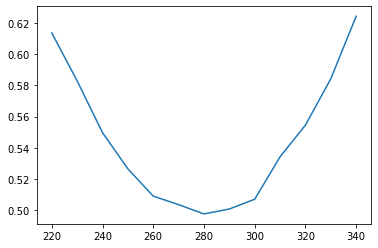

In [4]:
import matplotlib.pyplot as plt

plt.plot(strike_array, sigma_vectors)
plt.show()